In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
from datetime import datetime
from tqdm import tqdm

In [3]:
path_flow = '/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/'
files = sorted(glob(path_flow + 'psy4v3r1-daily_KZ_*.nc'))

start_time = datetime.strptime('2019-01-20 12:00:00', '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime('2018-10-11 12:00:00', '%Y-%m-%d %H:%M:%S')
start_index = 0 
end_index = 0

for file in files:
    if file[-13:-3] == start_time.strftime('%Y-%m-%d'):
        end_index = files.index(file)
        
    if file[-13:-3] == end_time.strftime('%Y-%m-%d'):
        start_index = files.index(file)
    
files = files[start_index:end_index+1]

mesh_mask = xr.open_dataset(files[0])
z_depths = mesh_mask['depthw'].values


In [4]:
lat_obs = -32.171
lon_obs = 6.287

lon_rest = abs(mesh_mask['nav_lon'][0,:] - lon_obs)
lat_rest = abs(mesh_mask['nav_lat'][:,0] - lat_obs)
lon_index = np.where(lon_rest == lon_rest.min())[0][0]
lat_index = np.where(lat_rest == lat_rest.min())[0][0]

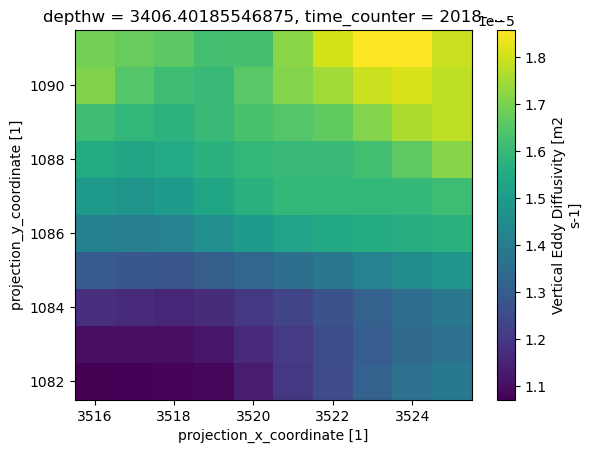

In [5]:
flow = xr.open_dataset(files[10])

d_deg = 5

indices = {'lat': range(lat_index-d_deg, lat_index+d_deg), 
           'lon': range(lon_index-d_deg, lon_index+d_deg)}
flow['votkeavt'][44, indices['lat'], indices['lon']].plot()

In [5]:
Kz = np.zeros((len(files), 50, len(indices['lat']), len(indices['lon'])))
# Kz_std = np.zeros((len(files), 50))

time = np.zeros(len(files),dtype='datetime64[ns]')

In [68]:
for i, filename in enumerate(tqdm(files)):
    T = xr.open_dataset(filename)
    Kz[i] = T['votkeavt'][:, indices['lat'], indices['lon']].values
    
    time[i] = T['time_counter'].values

  0%|          | 9/3754 [00:13<1:33:40,  1.50s/it]


KeyboardInterrupt: 

In [14]:
Kz = np.load('../data/Kz_profile_HC13.npy')

In [15]:
Kz_mean = np.nanmean(Kz, axis=(0,2,3))
Kz_std = np.nanstd(Kz, axis=(0,2,3))
Kz_median = np.nanmedian(Kz, axis=(0,2,3))

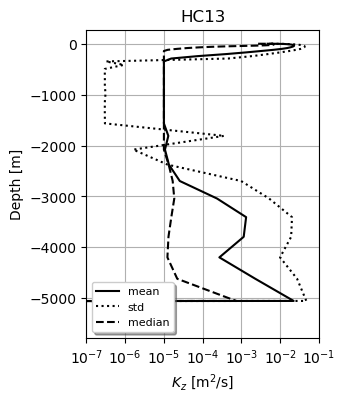

In [16]:
fig, ax = plt.subplots(figsize=(3,4))
ax.plot(Kz_mean, -z_depths, color='k', label='mean')
ax.plot(Kz_std, -z_depths, label='std', ls=':', color='k')
ax.plot(Kz_median, -z_depths, label='median', ls='--', color='k')
ax.semilogx()
ax.legend(shadow=True, fancybox=True, fontsize=8)
ax.set_xlabel('$K_z$ [m$^2$/s]')
ax.set_ylabel('Depth [m]')
ax.set_title('HC13')
ax.grid()
ax.set_xticks([1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
fig.savefig('../article_figs/Kz_profile_HC13.png', dpi=300, bbox_inches='tight')